In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('merged_touch_gesture.csv')

In [4]:
df.head()

,EID,Xvalue,Yvalue,pressure,touchMajor,touchMinor,pointerID,fingerOrientation,actionType,time,user
0,0,818.085938,1546.250000,1.0,0.976562,0.488281,0,0.0,0.0,2017-4-14 18:56:47:185,1
1,1,819.140625,1545.000000,1.0,2.929688,2.929688,0,0.0,NaN,NaN,1
2,2,820.074036,1543.893677,1.0,2.929688,2.929688,0,0.0,2.0,2017-4-14 18:56:47:209,1
3,3,820.195312,1543.750000,1.0,3.906250,2.929688,0,0.0,NaN,NaN,1
4,4,821.250000,1543.125000,1.0,4.394531,1.953125,0,0.0,NaN,NaN,1


In [5]:
df['fingerOrientation'] = df['fingerOrientation'].astype('category').cat.codes

In [6]:
df.rename(columns={"time": "gesture_time"}, inplace=True)

In [7]:
df.head()

,EID,Xvalue,Yvalue,pressure,touchMajor,touchMinor,pointerID,fingerOrientation,actionType,gesture_time,user
0,0,818.085938,1546.250000,1.0,0.976562,0.488281,0,0,0.0,2017-4-14 18:56:47:185,1
1,1,819.140625,1545.000000,1.0,2.929688,2.929688,0,0,NaN,NaN,1
2,2,820.074036,1543.893677,1.0,2.929688,2.929688,0,0,2.0,2017-4-14 18:56:47:209,1
3,3,820.195312,1543.750000,1.0,3.906250,2.929688,0,0,NaN,NaN,1
4,4,821.250000,1543.125000,1.0,4.394531,1.953125,0,0,NaN,NaN,1


In [8]:
df.dropna(subset=["gesture_time"], inplace=True)

In [9]:
df.head()

,EID,Xvalue,Yvalue,pressure,touchMajor,touchMinor,pointerID,fingerOrientation,actionType,gesture_time,user
0,0,818.085938,1546.250000,1.0,0.976562,0.488281,0,0,0.0,2017-4-14 18:56:47:185,1
2,2,820.074036,1543.893677,1.0,2.929688,2.929688,0,0,2.0,2017-4-14 18:56:47:209,1
5,5,821.585999,1542.925903,1.0,4.394531,1.953125,0,0,2.0,2017-4-14 18:56:47:225,1
7,7,819.386902,1533.480225,1.0,4.394531,1.953125,0,0,2.0,2017-4-14 18:56:47:242,1
10,10,817.907349,1522.374268,1.0,4.882812,2.441406,0,0,2.0,2017-4-14 18:56:47:259,1


In [10]:

# First, replace the last colon with a dot to match standard datetime format
df['gesture_time_str'] = df['gesture_time'].astype(str).str.replace(r':(\d{3})$', r'.\1', regex=True)

# Convert to datetime
df['gesture_time'] = pd.to_datetime(df['gesture_time_str'], format='%Y-%m-%d %H:%M:%S.%f')

# Drop the temporary string column
df.drop('gesture_time_str', axis=1, inplace=True)

# Step 2: Calculate gesture time differences

# Alternative vectorized approach (more efficient for large datasets):
df['Gesture_time_diff'] = df['gesture_time'].diff().shift(-1).dt.total_seconds() * 1000

df['Gesture_time_diff'].fillna(0, inplace=True)


C:\Users\88019\AppData\Local\Temp\ipykernel_16080\3848432198.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gesture_time_diff'].fillna(0, inplace=True)


In [11]:
df = df.drop(columns=['gesture_time'])

In [12]:
df.head()

,EID,Xvalue,Yvalue,pressure,touchMajor,touchMinor,pointerID,fingerOrientation,actionType,user,Gesture_time_diff
0,0,818.085938,1546.250000,1.0,0.976562,0.488281,0,0,0.0,1,24.0
2,2,820.074036,1543.893677,1.0,2.929688,2.929688,0,0,2.0,1,16.0
5,5,821.585999,1542.925903,1.0,4.394531,1.953125,0,0,2.0,1,17.0
7,7,819.386902,1533.480225,1.0,4.394531,1.953125,0,0,2.0,1,17.0
10,10,817.907349,1522.374268,1.0,4.882812,2.441406,0,0,2.0,1,17.0


In [13]:
df = df.drop(columns=['EID', 'pointerID', 'fingerOrientation', 'pressure'])

In [14]:
df.head()

,Xvalue,Yvalue,touchMajor,touchMinor,actionType,user,Gesture_time_diff
0,818.085938,1546.250000,0.976562,0.488281,0.0,1,24.0
2,820.074036,1543.893677,2.929688,2.929688,2.0,1,16.0
5,821.585999,1542.925903,4.394531,1.953125,2.0,1,17.0
7,819.386902,1533.480225,4.394531,1.953125,2.0,1,17.0
10,817.907349,1522.374268,4.882812,2.441406,2.0,1,17.0


In [15]:
df.isnull().sum()

Xvalue               0
Yvalue               0
touchMajor           0
touchMinor           0
actionType           0
user                 0
Gesture_time_diff    0
dtype: int64

In [16]:
df['actionType'] = df['actionType'].fillna(method='ffill').fillna(method='bfill')

C:\Users\88019\AppData\Local\Temp\ipykernel_16080\3653958585.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['actionType'] = df['actionType'].fillna(method='ffill').fillna(method='bfill')


In [17]:
df.head(10)

,Xvalue,Yvalue,touchMajor,touchMinor,actionType,user,Gesture_time_diff
0,818.085938,1546.250000,0.976562,0.488281,0.0,1,24.0
2,820.074036,1543.893677,2.929688,2.929688,2.0,1,16.0
5,821.585999,1542.925903,4.394531,1.953125,2.0,1,17.0
7,819.386902,1533.480225,4.394531,1.953125,2.0,1,17.0
10,817.907349,1522.374268,4.882812,2.441406,2.0,1,17.0
12,817.031250,1510.192139,4.882812,2.441406,2.0,1,17.0
15,817.031250,1501.480713,4.394531,1.953125,2.0,1,16.0
17,817.031250,1497.261475,4.882812,3.417969,2.0,1,17.0
19,818.024048,1490.366577,4.882812,3.417969,2.0,1,17.0
22,819.488770,1481.687012,4.882812,3.417969,2.0,1,17.0


In [20]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Identify outlier stats first
numeric_cols = ['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'Gesture_time_diff']
outlier_counts = {}
total_rows = len(df)

scaling_strategy = {}  # Store which scaler to use for each column

# Determine outlier stats and appropriate scaler
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / total_rows) * 100

    outlier_counts[col] = {
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_percentage
    }

    # Decide which scaler to apply
    if outlier_percentage <= 5:
        scaling_strategy[col] = 'minmax'
    else:
        scaling_strategy[col] = 'robust'

# Print decisions
print("📊 Scaling Strategy Based on Outlier Percentage:")
for col in numeric_cols:
    print(f"{col}: {outlier_counts[col]['outlier_percentage']:.2f}% outliers → {scaling_strategy[col].capitalize()}Scaler")

# Apply scalers accordingly
for col in numeric_cols:
    if scaling_strategy[col] == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = RobustScaler()

    df[[col]] = scaler.fit_transform(df[[col]])


📊 Scaling Strategy Based on Outlier Percentage:
Xvalue: 0.00% outliers → MinmaxScaler
Yvalue: 1.12% outliers → MinmaxScaler
touchMajor: 0.00% outliers → MinmaxScaler
touchMinor: 0.00% outliers → MinmaxScaler
Gesture_time_diff: 28.33% outliers → RobustScaler


In [21]:
df.head(20)

,Xvalue,Yvalue,touchMajor,touchMinor,actionType,user,Gesture_time_diff
0,0.567198,0.758421,0.020768,0.000000,0.0,1,7.0
2,0.568532,0.757474,0.103838,0.157391,2.0,1,-1.0
5,0.569547,0.757084,0.166141,0.094435,2.0,1,0.0
7,0.568071,0.753285,0.166141,0.094435,2.0,1,0.0
10,0.567078,0.748818,0.186908,0.125913,2.0,1,0.0
12,0.566490,0.743918,0.186908,0.125913,2.0,1,0.0
15,0.566490,0.740415,0.166141,0.094435,2.0,1,-1.0
17,0.566490,0.738718,0.186908,0.188869,2.0,1,0.0
19,0.567156,0.735944,0.186908,0.188869,2.0,1,0.0
22,0.568139,0.732453,0.186908,0.188869,2.0,1,0.0


In [22]:
df.to_csv('C:\\Users\\88019\Downloads\\p2\\BB-MAS_Dataset (keystroke and swipe)\BB-MAS_Dataset\\output_touch_gesture.csv', index=False)

In [23]:
SEQUENCE_LENGTH = 20

def create_sequences(df, user_col='user'):
    sequences = []
    labels = []
    for user_id, user_group in df.groupby(user_col):
        user_data = user_group[['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'Gesture_time_diff']].values
        for i in range(0, len(user_data) - SEQUENCE_LENGTH + 1):
            seq = user_data[i:i + SEQUENCE_LENGTH]
            sequences.append(seq)
            labels.append(user_id)
    return np.array(sequences), np.array(labels)

X, y = create_sequences(df)


In [24]:
print(df.columns.tolist())


['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'user', 'Gesture_time_diff']


In [25]:
# Maximum values of each column
max_values = df.max()

# Minimum values of each column
min_values = df.min()

print(max_values)
print(min_values)

Xvalue                       1.0
Yvalue                       1.0
touchMajor                   1.0
touchMinor                   1.0
actionType                 262.0
user                       100.0
Gesture_time_diff    613679451.0
dtype: float64
Xvalue                      0.0
Yvalue                      0.0
touchMajor                  0.0
touchMinor                  0.0
actionType                  0.0
user                        1.0
Gesture_time_diff   -95459208.0
dtype: float64


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 input_27 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 model_16 (Functional)          (None, 64)           18176       ['input_26[0][0]',               
                                                                  'input_27[0][0]']               
                                                                                                  
 lambda_8 (Lambda)              (None, 64)           0           ['model_16[0][0]',        

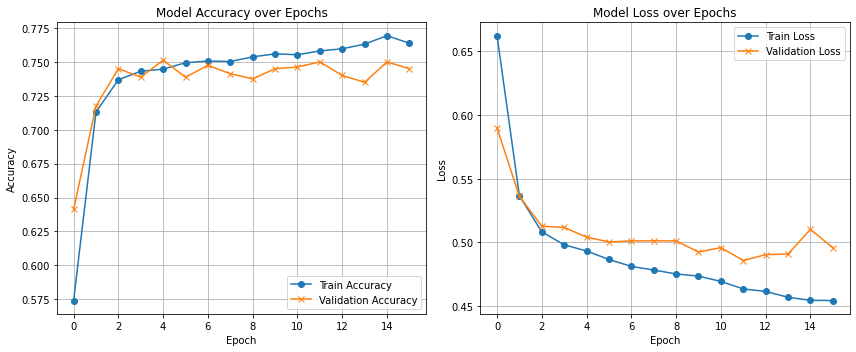

25/25 [==============================] - 1s 5ms/step

📈 Classification Report:
              precision    recall  f1-score   support

           0     0.8156    0.6021    0.6928       382
           1     0.7066    0.8756    0.7821       418

    accuracy                         0.7450       800
   macro avg     0.7611    0.7388    0.7374       800
weighted avg     0.7586    0.7450    0.7394       800



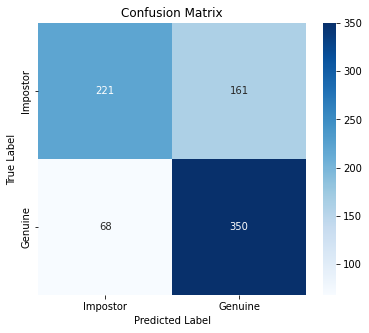

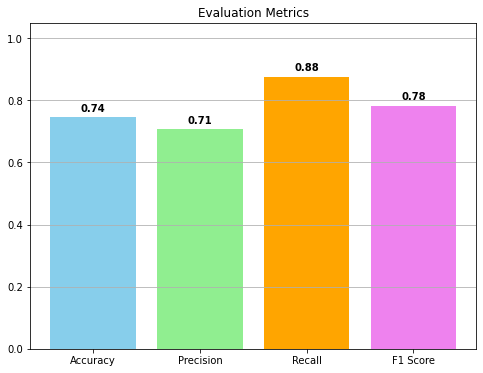

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


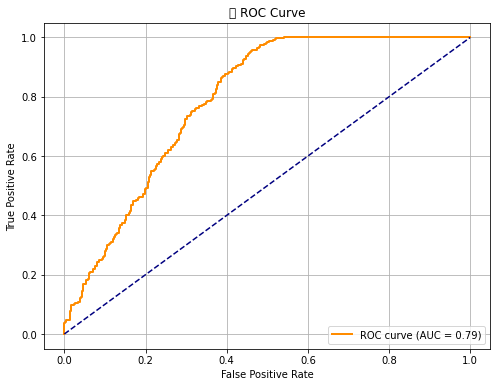

7/7 [==============================] - 2s 12ms/step

🔍 Test similarity scores with user 52:
Sample 1: 26.03% → ❌ Not a match
Sample 2: 49.25% → ❌ Not a match
Sample 3: 51.76% → ❌ Not a match
Sample 4: 59.93% → ❌ Not a match
Sample 5: 39.25% → ❌ Not a match
Sample 6: 35.40% → ❌ Not a match
Sample 7: 18.41% → ❌ Not a match
Sample 8: 55.72% → ❌ Not a match
Sample 9: 61.75% → ❌ Not a match
Sample 10: 56.33% → ❌ Not a match
Sample 11: 63.36% → ❌ Not a match
Sample 12: 45.62% → ❌ Not a match
Sample 13: 21.14% → ❌ Not a match
Sample 14: 52.88% → ❌ Not a match
Sample 15: 46.44% → ❌ Not a match
Sample 16: 60.14% → ❌ Not a match
Sample 17: 67.45% → ✅ Match
Sample 18: 28.36% → ❌ Not a match
Sample 19: 75.67% → ✅ Match
Sample 20: 71.56% → ✅ Match
Sample 21: 51.01% → ❌ Not a match
Sample 22: 76.39% → ✅ Match
Sample 23: 71.58% → ✅ Match
Sample 24: 51.10% → ❌ Not a match
Sample 25: 30.47% → ❌ Not a match
Sample 26: 32.68% → ❌ Not a match
Sample 27: 33.57% → ❌ Not a match
Sample 28: 43.39% → ❌ Not a m

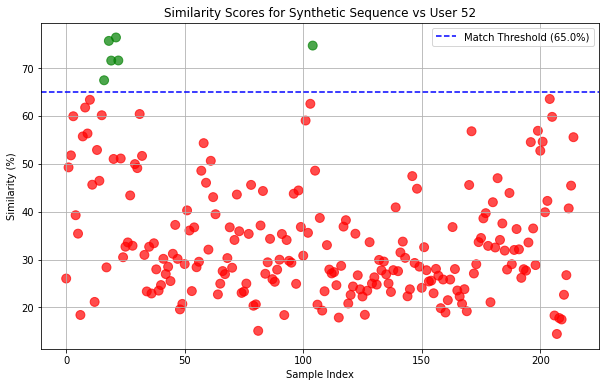

In [34]:
# Siamese LSTM for Touch Gesture Authentication (with Confusion Matrix Plot)

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns

# --------------------------
# Prepare Sequences
# --------------------------
features = ['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'Gesture_time_diff']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Siamese LSTM Model
# --------------------------
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)
model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

# --------------------------
# Train Model
# --------------------------
history = model.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=16,
    batch_size=32
)

model.save('siamese_lstm_model.h5')

# --------------------------
# Accuracy and Loss Graphs
# --------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------
# Evaluate Model
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Impostor', 'Genuine'], yticklabels=['Impostor', 'Genuine'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(labels, metrics, color=['skyblue', 'lightgreen', 'orange', 'violet'])
plt.ylim(0, 1.05)
plt.title('Evaluation Metrics')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Synthetic Test Sequence Match
# --------------------------
target_user = 52
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

feature_ranges = {
    'Xvalue': (-1.334735e+00, 9.776609e-01),
    'Yvalue': (-2.158944e+00, 3.356786e+00),
    'touchMajor': (-1.051641e+00, 1.853282e+00),
    'touchMinor': (-9.874038e-01, 1.791463e+00),
    'actionType': (0.000000e+00, 2.620000e+02),
    'Gesture_time_diff': (-9.545921e+07, 6.136795e+08),
}

random_sequence = np.array([
    [np.random.uniform(low, high) for low, high in feature_ranges.values()]
    for _ in range(step)
], dtype='float32')

new_sequence_padded = pad_sequences([random_sequence], maxlen=max_len, dtype='float32')[0]
test_batch = np.repeat(new_sequence_padded[None, :], len(user_samples_padded), axis=0)

similarities = model.predict([test_batch, user_samples_padded])
percentages = similarities.flatten() * 100

match_threshold = 65.00
match_count = sum(p >= match_threshold for p in percentages)

print(f"\n🔍 Test similarity scores with user {target_user}:")
for i, p in enumerate(percentages):
    verdict = "✅ Match" if p >= match_threshold else "❌ Not a match"
    print(f"Sample {i+1}: {p:.2f}% → {verdict}")

print("\n📊 Summary Report:")
print(f"Total samples compared: {len(percentages)}")
print(f"Matches found: {match_count}")
print(f"Match threshold: {match_threshold:.2f}%")

plt.figure(figsize=(10, 6))
colors = ['green' if p >= match_threshold else 'red' for p in percentages]
plt.scatter(range(len(percentages)), percentages, c=colors, alpha=0.7, s=80)
plt.axhline(match_threshold, color='blue', linestyle='--', label=f'Match Threshold ({match_threshold}%)')
plt.title(f'Similarity Scores for Synthetic Sequence vs User {target_user}')
plt.xlabel('Sample Index')
plt.ylabel('Similarity (%)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20
100/100 [==============================] - 4s 16ms/step - loss: 0.6683 - accuracy: 0.5522 - val_loss: 0.5951 - val_accuracy: 0.6263
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5474 - accuracy: 0.7028 - val_loss: 0.5358 - val_accuracy: 0.7237
Epoch 3/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5320 - accuracy: 0.7200 - val_loss: 0.5282 - val_accuracy: 0.7312
Epoch 4/20
100/100 [==============================] - 1s 11ms/step - loss: 0.5222 - accuracy: 0.7219 - val_loss: 0.5208 - val_accuracy: 0.7312
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5142 - accuracy: 0.7219 - val_loss: 0.5224 - val_accuracy: 0.7275
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5115 - accuracy: 0.7237 - val_loss: 0.5220 - val_accuracy: 0.7325
Epoch 7/20
100/100 [==============================] - 1s 10ms/step - loss: 0.5044 - accuracy: 0.7284 - val_loss: 0.5170 - val_accuracy: 0.7287
Epo

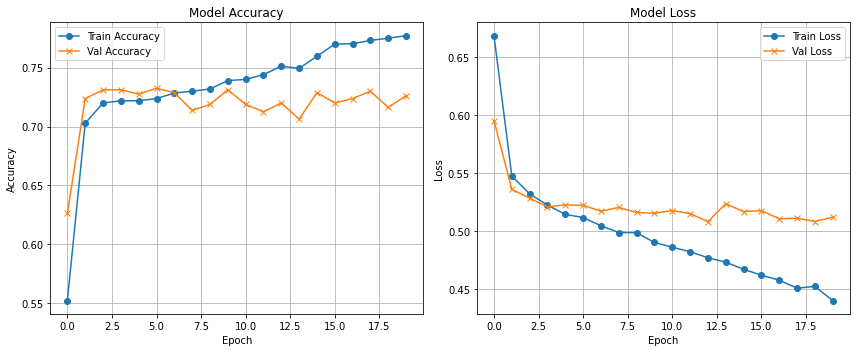

25/25 [==============================] - 1s 3ms/step

📈 Classification Report:
              precision    recall  f1-score   support

           0     0.8075    0.5602    0.6615       382
           1     0.6860    0.8780    0.7702       418

    accuracy                         0.7262       800
   macro avg     0.7468    0.7191    0.7159       800
weighted avg     0.7440    0.7262    0.7183       800



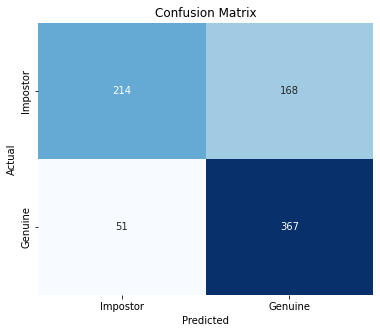

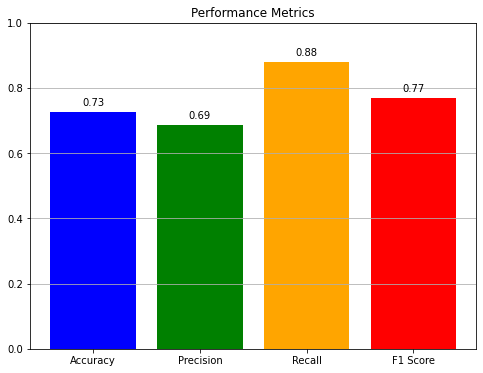

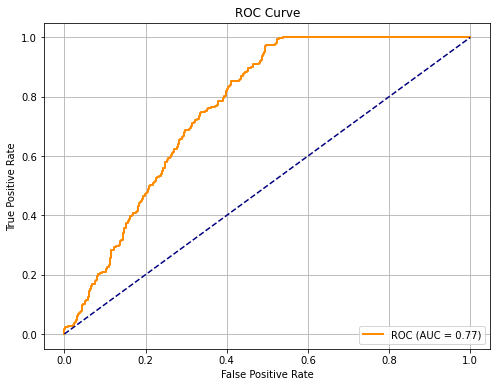

7/7 [==============================] - 1s 5ms/step

🔍 Similarity scores for noisy input vs user 52:
Sample 1: 83.06% → ✅ Match
Sample 2: 78.20% → ✅ Match
Sample 3: 70.14% → ✅ Match
Sample 4: 63.85% → ❌ Not a match
Sample 5: 73.36% → ✅ Match
Sample 6: 79.56% → ✅ Match
Sample 7: 59.85% → ❌ Not a match
Sample 8: 62.21% → ❌ Not a match
Sample 9: 60.00% → ❌ Not a match
Sample 10: 72.52% → ✅ Match
Sample 11: 63.74% → ❌ Not a match
Sample 12: 70.25% → ✅ Match
Sample 13: 86.79% → ✅ Match
Sample 14: 67.49% → ✅ Match
Sample 15: 77.86% → ✅ Match
Sample 16: 63.29% → ❌ Not a match
Sample 17: 65.36% → ✅ Match
Sample 18: 62.89% → ❌ Not a match
Sample 19: 42.29% → ❌ Not a match
Sample 20: 62.51% → ❌ Not a match
Sample 21: 68.03% → ✅ Match
Sample 22: 67.39% → ✅ Match
Sample 23: 71.60% → ✅ Match
Sample 24: 78.05% → ✅ Match
Sample 25: 62.38% → ❌ Not a match
Sample 26: 69.54% → ✅ Match
Sample 27: 59.84% → ❌ Not a match
Sample 28: 59.48% → ❌ Not a match
Sample 29: 66.30% → ✅ Match
Sample 30: 64.78% → ❌ Not

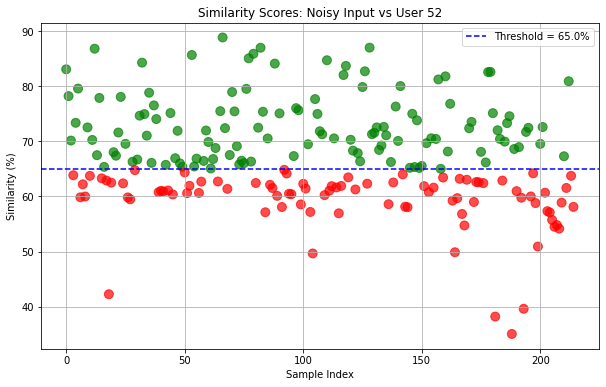

In [35]:
# Siamese LSTM Biased - Updated with Training Curves, Confusion Matrix Plot, ROC Curve

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_score,
    recall_score, f1_score, accuracy_score, roc_curve, auc
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------------------
# Load and prepare data (assume df is already loaded)
# --------------------------
features = ['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'Gesture_time_diff']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=2000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())
    for _ in range(max_pairs):
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)
        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)
    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences)

max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Model Definition
# --------------------------
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)
L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])
output = Dense(1, activation='sigmoid')(L1_distance)
model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# --------------------------
# Train the Model
# --------------------------
history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=20, batch_size=32
)

# --------------------------
# Training Curves
# --------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------
# Evaluate Model
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Impostor', 'Genuine'], yticklabels=['Impostor', 'Genuine'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Metrics Plot
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
bars = plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'],
               [accuracy, precision, recall, f1],
               color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
for bar, score in zip(bars, [accuracy, precision, recall, f1]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{score:.2f}', ha='center')
plt.grid(True, axis='y')
plt.show()

# --------------------------
# ROC Curve
# --------------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Noisy Input Similarity Test
# --------------------------
target_user = 52
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

base_sequence = random.choice(user_samples)
noise_std = 0.05
noisy_sequence = base_sequence + np.random.normal(0, noise_std, base_sequence.shape)
noisy_sequence_padded = pad_sequences([noisy_sequence], maxlen=max_len, dtype='float32')[0]

test_batch = np.repeat(noisy_sequence_padded[None, :], len(user_samples_padded), axis=0)
similarities = model.predict([test_batch, user_samples_padded])
percentages = similarities.flatten() * 100

match_threshold = 65.00
match_count = sum(p >= match_threshold for p in percentages)

print(f"\n🔍 Similarity scores for noisy input vs user {target_user}:")
for i, p in enumerate(percentages):
    verdict = "✅ Match" if p >= match_threshold else "❌ Not a match"
    print(f"Sample {i+1}: {p:.2f}% → {verdict}")

print("\n📊 Summary Report:")
print(f"Total comparisons: {len(percentages)}")
print(f"Matches found: {match_count}")
print(f"Match threshold: {match_threshold:.2f}%")

plt.figure(figsize=(10, 6))
colors = ['green' if p >= match_threshold else 'red' for p in percentages]
plt.scatter(range(len(percentages)), percentages, c=colors, s=80, alpha=0.7)
plt.axhline(match_threshold, color='blue', linestyle='--', label=f'Threshold = {match_threshold}%')
plt.title(f'Similarity Scores: Noisy Input vs User {target_user}')
plt.xlabel('Sample Index')
plt.ylabel('Similarity (%)')
plt.legend()
plt.grid(True)
plt.show()


Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 input_39 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 model_24 (Functional)          (None, 64)           13824       ['input_38[0][0]',               
                                                                  'input_39[0][0]']               
                                                                                                  
 lambda_12 (Lambda)             (None, 64)           0           ['model_24[0][0]',        

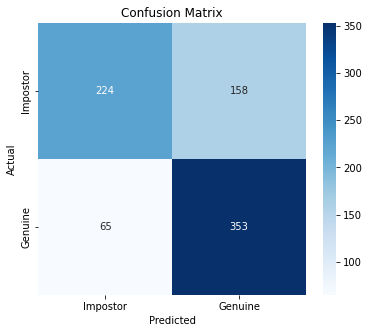

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


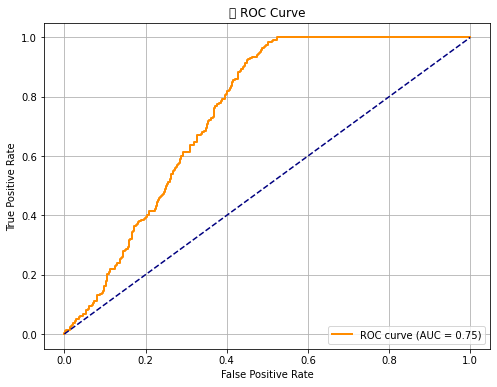

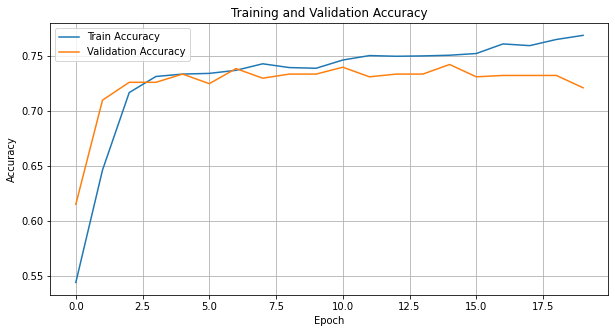

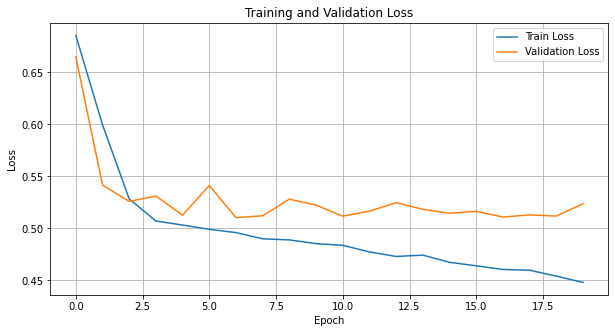


📋 Final Evaluation Metrics:
Accuracy : 0.7212
Precision: 0.6908
Recall   : 0.8445
F1-Score : 0.7600


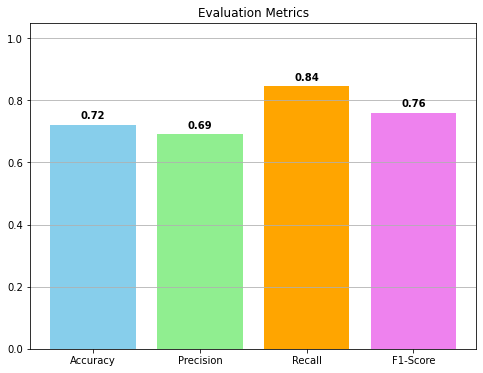

In [38]:
#Siamese GRU unbiased
 
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------------------
# Preprocessing
# --------------------------
features = ['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'Gesture_time_diff']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Model
# --------------------------
input_shape = (max_len, len(features))

def build_gru_branch(input_shape):
    inp = Input(shape=input_shape)
    x = GRU(64)(inp)
    return Model(inputs=inp, outputs=x)

gru_branch = build_gru_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = gru_branch(input_a)
encoded_b = gru_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)
model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

# --------------------------
# Training
# --------------------------
history = model.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=20,
    batch_size=32
)

model.save('siamese_gru_model.h5')

# --------------------------
# Evaluation
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n\U0001F4C8 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))

cm = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Impostor', 'Genuine'], yticklabels=['Impostor', 'Genuine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --------------------------
# ROC Curve
# --------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('\U0001F4CA ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Accuracy and Loss Curves
# --------------------------
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# Final Evaluation Metrics Bar
# --------------------------
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("\n\U0001F4CB Final Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

plt.figure(figsize=(8, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'orange', 'violet']

plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.05)
plt.title('Evaluation Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y')
plt.show()



Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_44 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 input_45 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 model_28 (Functional)          (None, 64)           16064       ['input_44[0][0]',               
                                                                  'input_45[0][0]']               
                                                                                                  
 lambda_14 (Lambda)             (None, 64)           0           ['model_28[0][0]',        

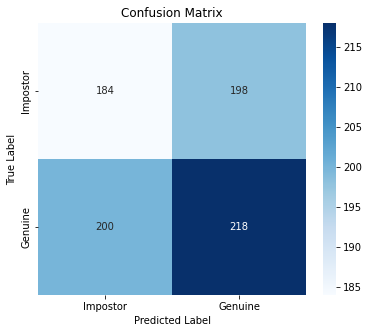

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


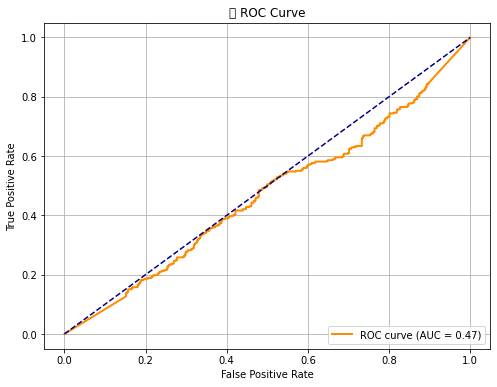

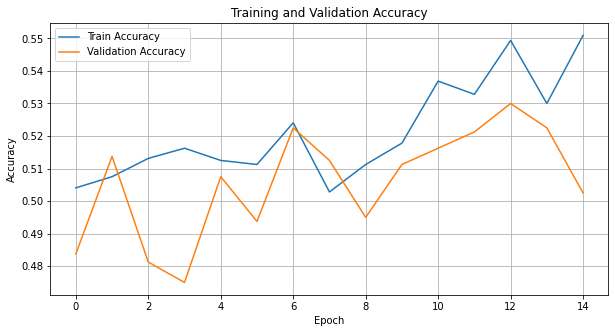

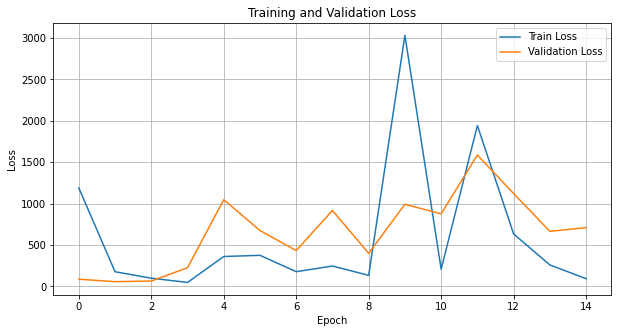

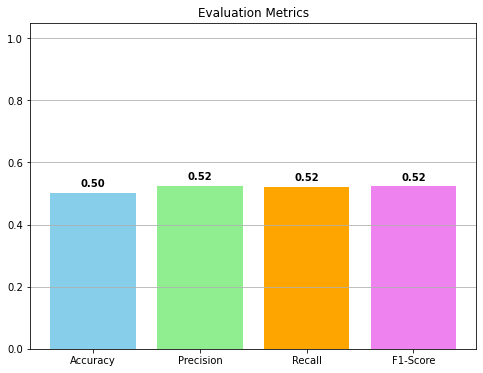

7/7 [==============================] - 0s 2ms/step

🔍 Test similarity scores with user 52:
Sample 1: 0.00% → ❌ Not a match
Sample 2: 100.00% → ✅ Match
Sample 3: 0.00% → ❌ Not a match
Sample 4: 100.00% → ✅ Match
Sample 5: 0.00% → ❌ Not a match
Sample 6: 0.00% → ❌ Not a match
Sample 7: 27.18% → ❌ Not a match
Sample 8: 29.77% → ❌ Not a match
Sample 9: 31.34% → ❌ Not a match
Sample 10: 73.29% → ✅ Match
Sample 11: 99.98% → ✅ Match
Sample 12: 21.63% → ❌ Not a match
Sample 13: 86.60% → ✅ Match
Sample 14: 97.14% → ✅ Match
Sample 15: 100.00% → ✅ Match
Sample 16: 100.00% → ✅ Match
Sample 17: 100.00% → ✅ Match
Sample 18: 29.00% → ❌ Not a match
Sample 19: 42.53% → ❌ Not a match
Sample 20: 61.07% → ❌ Not a match
Sample 21: 100.00% → ✅ Match
Sample 22: 100.00% → ✅ Match
Sample 23: 100.00% → ✅ Match
Sample 24: 0.00% → ❌ Not a match
Sample 25: 67.21% → ✅ Match
Sample 26: 99.97% → ✅ Match
Sample 27: 28.31% → ❌ Not a match
Sample 28: 1.86% → ❌ Not a match
Sample 29: 24.86% → ❌ Not a match
Sample 30: 32.

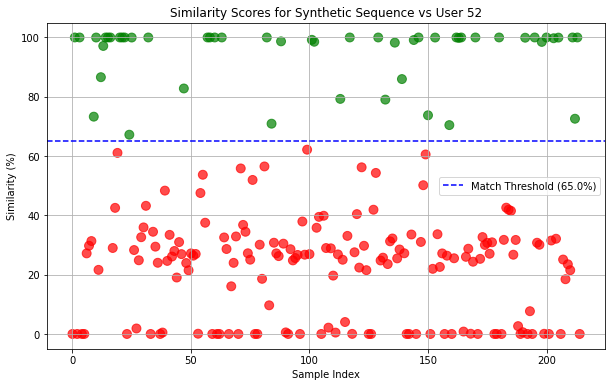

In [40]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------------------
# Prepare Data
# --------------------------
features = ['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'Gesture_time_diff']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Siamese Dense Model
# --------------------------
input_shape = (max_len, len(features))

def build_dense_branch(input_shape):
    inp = Input(shape=input_shape)
    x = Flatten()(inp)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    return Model(inputs=inp, outputs=x)

dense_branch = build_dense_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = dense_branch(input_a)
encoded_b = dense_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

# --------------------------
# Train the Model
# --------------------------
history = model.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=15,
    batch_size=32
)

model.save('siamese_dense_model.h5')

# --------------------------
# Evaluate Model
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Impostor', 'Genuine'], yticklabels=['Impostor', 'Genuine'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Accuracy and Loss Plots
# --------------------------
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# Final Evaluation Metrics
# --------------------------
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'orange', 'violet']

plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.05)
plt.title('Evaluation Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y')
plt.show()

# --------------------------
# Synthetic Test Sequence Match
# --------------------------
target_user = 52
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

feature_array = df[features].values
q1 = np.percentile(feature_array, 25, axis=0)
q3 = np.percentile(feature_array, 75, axis=0)
median = np.median(feature_array, axis=0)

random_sequence = np.array([
    [np.random.uniform(m - 1.5 * (q3[i] - q1[i]), m + 1.5 * (q3[i] - q1[i]))
     for i, m in enumerate(median)]
    for _ in range(step)
], dtype='float32')

new_sequence_padded = pad_sequences([random_sequence], maxlen=max_len, dtype='float32')[0]
test_batch = np.repeat(new_sequence_padded[None, :], len(user_samples_padded), axis=0)

similarities = model.predict([test_batch, user_samples_padded])
percentages = similarities.flatten() * 100

match_threshold = 65.00
match_count = sum(p >= match_threshold for p in percentages)

print(f"\n🔍 Test similarity scores with user {target_user}:")
for i, p in enumerate(percentages):
    verdict = "✅ Match" if p >= match_threshold else "❌ Not a match"
    print(f"Sample {i+1}: {p:.2f}% → {verdict}")

print("\n📊 Summary Report:")
print(f"Total samples compared: {len(percentages)}")
print(f"Matches found: {match_count}")
print(f"Match threshold: {match_threshold:.2f}%")

plt.figure(figsize=(10, 6))
colors = ['green' if p >= match_threshold else 'red' for p in percentages]
plt.scatter(range(len(percentages)), percentages, c=colors, alpha=0.7, s=80)
plt.axhline(match_threshold, color='blue', linestyle='--', label=f'Match Threshold ({match_threshold}%)')
plt.title(f'Similarity Scores for Synthetic Sequence vs User {target_user}')
plt.xlabel('Sample Index')
plt.ylabel('Similarity (%)')
plt.legend()
plt.grid(True)
plt.show()



📊 Siamese Model Evaluation:
       Accuracy  Precision  Recall  F1 Score  ROC AUC
Dense    0.5525     0.5704  0.5813    0.5758   0.5391
LSTM     0.6925     0.6903  0.7464    0.7172   0.7549
GRU      0.7275     0.6887  0.8732    0.7700   0.7688


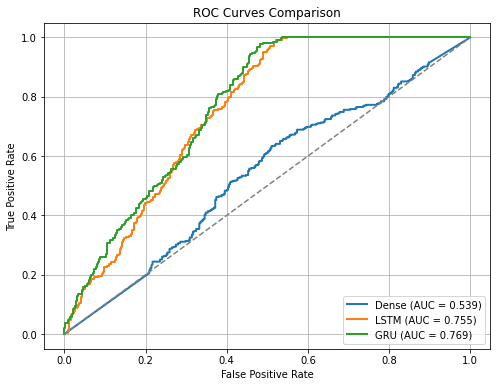

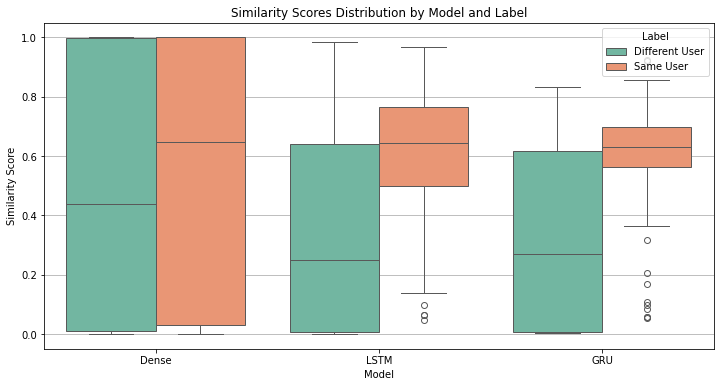

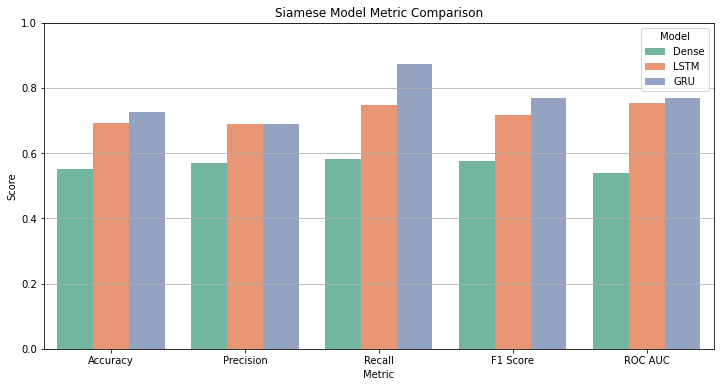

In [ ]:
#comparison of siamese lstm siamese gru and siamese neural network (gru) 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score,
    precision_score, recall_score, f1_score
)
from tensorflow.keras.models import load_model

# === Load your models ===
siamese_dense = load_model('siamese_dense_model.h5', compile=True)
siamese_lstm = load_model('siamese_lstm_model.h5', compile=True)
siamese_gru = load_model('siamese_gru_model.h5', compile=True)

# === Similarity function ===
def get_similarity_scores(model, X1, X2):
    return model.predict([X1, X2], verbose=0).flatten()

# === Make sure test data is NumPy arrays ===
X1_test = np.array(X1_test)
X2_test = np.array(X2_test)
y_test = np.array(y_test)

# === Predict similarity scores ===
dense_sim = get_similarity_scores(siamese_dense, X1_test, X2_test)
lstm_sim = get_similarity_scores(siamese_lstm, X1_test, X2_test)
gru_sim = get_similarity_scores(siamese_gru, X1_test, X2_test)

# === Convert scores to binary predictions (threshold 0.5) ===
dense_pred = (dense_sim >= 0.5).astype(int)
lstm_pred = (lstm_sim >= 0.5).astype(int)
gru_pred = (gru_sim >= 0.5).astype(int)

# === Compute metrics ===
def compute_metrics(y_true, y_pred, y_score):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_score)
    }

metrics = {
    "Dense": compute_metrics(y_test, dense_pred, dense_sim),
    "LSTM": compute_metrics(y_test, lstm_pred, lstm_sim),
    "GRU": compute_metrics(y_test, gru_pred, gru_sim)
}

# === Print metrics as a table ===
df_metrics = pd.DataFrame(metrics).T
print("\n📊 Siamese Model Evaluation:")
print(df_metrics.round(4))

# === ROC Curve Plot ===
plt.figure(figsize=(8, 6))
for name, sim_scores in zip(['Dense', 'LSTM', 'GRU'], [dense_sim, lstm_sim, gru_sim]):
    fpr, tpr, _ = roc_curve(y_test, sim_scores)
    auc = roc_auc_score(y_test, sim_scores)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# === Boxplot of Similarity Scores ===
data = []
for model_name, sim_scores in zip(['Dense', 'LSTM', 'GRU'], [dense_sim, lstm_sim, gru_sim]):
    for label in [0, 1]:
        label_name = 'Same User' if label == 1 else 'Different User'
        data.extend([
            {'Model': model_name, 'Label': label_name, 'Similarity': score}
            for score in sim_scores[y_test == label]
        ])

df_box = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Similarity', hue='Label', data=df_box, palette='Set2')
plt.title('Similarity Scores Distribution by Model and Label')
plt.ylabel('Similarity Score')
plt.grid(True, axis='y')
plt.show()

# === Bar Plot for All Metrics ===
df_melt = df_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='index', data=df_melt, palette='Set2')
plt.title('Siamese Model Metric Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.legend(title='Model')
plt.show()


In [181]:
print(df.columns.tolist())

['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'user', 'Gesture_time_diff']


Model: "model_143"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_215 (InputLayer)         [(None, 10, 6)]      0           []                               
                                                                                                  
 input_216 (InputLayer)         [(None, 10, 6)]      0           []                               
                                                                                                  
 model_142 (Functional)         (None, 64)           18176       ['input_215[0][0]',              
                                                                  'input_216[0][0]']              
                                                                                                  
 lambda_71 (Lambda)             (None, 64)           0           ['model_142[0][0]',      

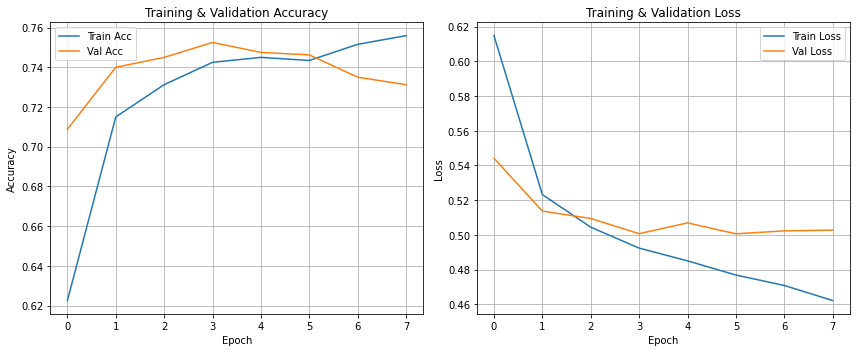

25/25 [==============================] - 1s 16ms/step

📈 Classification Report:
              precision    recall  f1-score   support

           0     0.7889    0.5969    0.6796       382
           1     0.6986    0.8541    0.7686       418

    accuracy                         0.7312       800
   macro avg     0.7438    0.7255    0.7241       800
weighted avg     0.7417    0.7312    0.7261       800



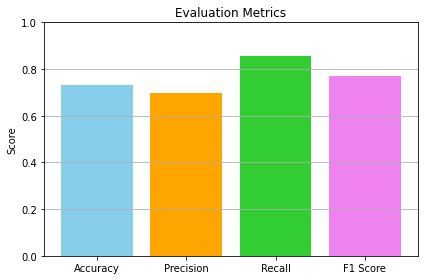

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


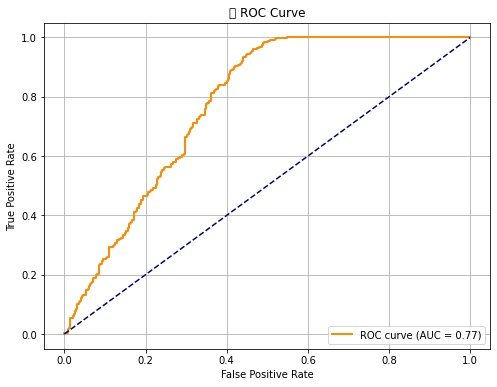

Noise STD: 0.01 → Accuracy: 0.2632, Precision: 1.0000, Recall: 0.2632, F1: 0.4167
Noise STD: 0.02 → Accuracy: 0.2626, Precision: 1.0000, Recall: 0.2626, F1: 0.4160
Noise STD: 0.03 → Accuracy: 0.2638, Precision: 1.0000, Recall: 0.2638, F1: 0.4175
Noise STD: 0.04 → Accuracy: 0.2615, Precision: 1.0000, Recall: 0.2615, F1: 0.4146
Noise STD: 0.05 → Accuracy: 0.2631, Precision: 1.0000, Recall: 0.2631, F1: 0.4166
Noise STD: 0.06 → Accuracy: 0.2623, Precision: 1.0000, Recall: 0.2623, F1: 0.4156
Noise STD: 0.07 → Accuracy: 0.2631, Precision: 1.0000, Recall: 0.2631, F1: 0.4165
Noise STD: 0.08 → Accuracy: 0.2613, Precision: 1.0000, Recall: 0.2613, F1: 0.4143
Noise STD: 0.09 → Accuracy: 0.2614, Precision: 1.0000, Recall: 0.2614, F1: 0.4144
Noise STD: 0.10 → Accuracy: 0.2614, Precision: 1.0000, Recall: 0.2614, F1: 0.4145


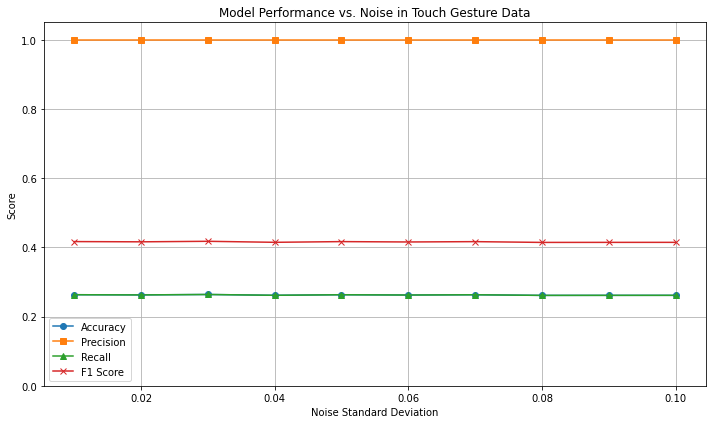

In [192]:
#Simease LSTM Unbiased Comparing of accuracy with variable noise

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    accuracy_score, precision_score, recall_score, f1_score
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences



features = ['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'Gesture_time_diff']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        # Positive pair
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        # Negative pair
        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

# Padding
max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

# Train-test split
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Siamese LSTM Model
# --------------------------
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

model.summary()

# --------------------------
# Train the Model
# --------------------------
history = model.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=8,
    batch_size=32
)

# --------------------------
# Training History Plots
# --------------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------
# Evaluate Model
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
report = classification_report(y_test, y_pred_class, digits=4)
print(report)

# Extract metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, zero_division=0)
recall = recall_score(y_test, y_pred_class, zero_division=0)
f1 = f1_score(y_test, y_pred_class, zero_division=0)

# Bar plot
plt.figure(figsize=(6, 4))
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['skyblue', 'orange', 'limegreen', 'violet']
plt.bar(labels, metrics, color=colors)
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --------------------------
# ROC Curve
# --------------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Noise Robustness Analysis
# --------------------------
noise_levels = np.linspace(0.01, 0.1, 10)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

match_threshold = 0.65
target_user = 52
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

for noise_std in noise_levels:
    y_true = []
    y_pred = []

    for base_seq in user_samples:
        noisy_seq = base_seq + np.random.normal(0, noise_std, base_seq.shape)
        noisy_seq_padded = pad_sequences([noisy_seq], maxlen=max_len, dtype='float32')[0]
        test_batch = np.repeat(noisy_seq_padded[None, :], len(user_samples_padded), axis=0)

        similarity_scores = model.predict([test_batch, user_samples_padded], verbose=0).flatten()
        predictions = (similarity_scores >= match_threshold).astype(int)
        true_labels = np.ones_like(predictions)

        y_true.extend(true_labels)
        y_pred.extend(predictions)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    print(f"Noise STD: {noise_std:.2f} → Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# --------------------------
# Plotting Noise vs Metrics
# --------------------------
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, accuracy_list, marker='o', label='Accuracy')
plt.plot(noise_levels, precision_list, marker='s', label='Precision')
plt.plot(noise_levels, recall_list, marker='^', label='Recall')
plt.plot(noise_levels, f1_list, marker='x', label='F1 Score')
plt.title('Model Performance vs. Noise in Touch Gesture Data')
plt.xlabel('Noise Standard Deviation')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_47 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 input_48 (InputLayer)          [(None, 10, 6)]      0           []                               
                                                                                                  
 model_30 (Functional)          (None, 64)           18176       ['input_47[0][0]',               
                                                                  'input_48[0][0]']               
                                                                                                  
 lambda_15 (Lambda)             (None, 64)           0           ['model_30[0][0]',        

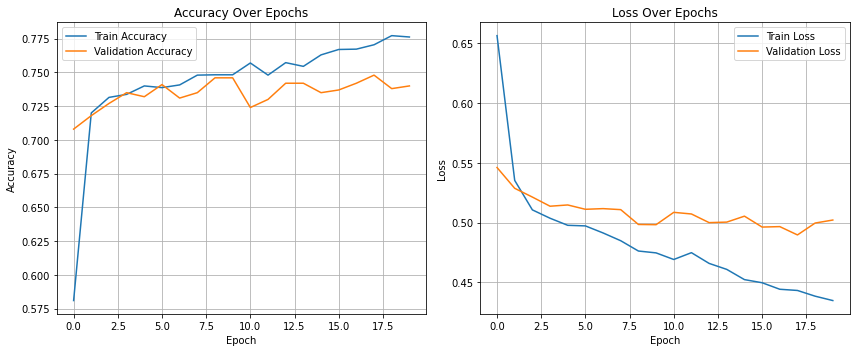

32/32 [==============================] - 4s 5ms/step

📈 Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.8642    0.5980    0.7069       500
           1     0.6927    0.9060    0.7851       500

    accuracy                         0.7520      1000
   macro avg     0.7784    0.7520    0.7460      1000
weighted avg     0.7784    0.7520    0.7460      1000

Overall Test Accuracy: 0.7520
Overall Test Precision: 0.6927
Overall Test Recall: 0.9060
Overall Test F1 Score: 0.7851


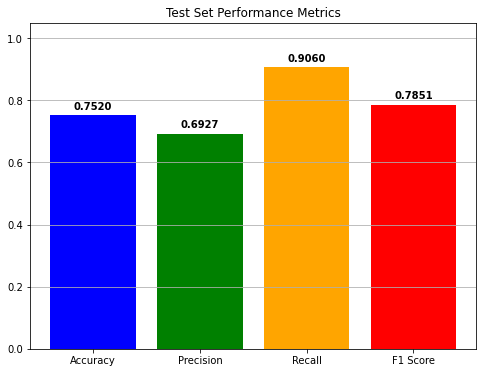

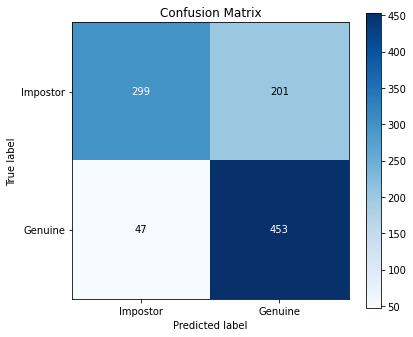

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


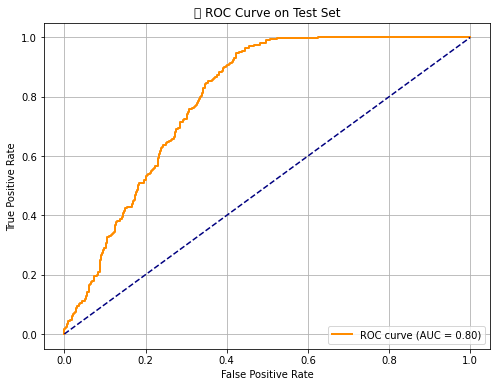

In [41]:
# Siamese LSTM 80% Train, 10% Validation, 10% Test with Confusion Matrix Plot

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    accuracy_score, precision_score, recall_score, f1_score
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------------------
# Assume df is already loaded here
# --------------------------
features = ['Xvalue', 'Yvalue', 'touchMajor', 'touchMinor', 'actionType', 'Gesture_time_diff']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

# --------------------------
# Split sequences into train, val, test (80/10/10)
# --------------------------
def split_user_sequences(user_sequences, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    train_seqs = {}
    val_seqs = {}
    test_seqs = {}
    for user, seqs in user_sequences.items():
        n = len(seqs)
        idx_train_end = int(train_ratio * n)
        idx_val_end = idx_train_end + int(val_ratio * n)
        train_seqs[user] = seqs[:idx_train_end] if idx_train_end > 0 else seqs
        val_seqs[user] = seqs[idx_train_end:idx_val_end] if idx_val_end > idx_train_end else []
        test_seqs[user] = seqs[idx_val_end:] if n > idx_val_end else []
    return train_seqs, val_seqs, test_seqs

train_sequences, val_sequences, test_sequences = split_user_sequences(user_sequences)

# --------------------------
# Create pairs function
# --------------------------
def create_pairs_from_sequences(user_seq_dict, max_pairs=1000):
    pairs = []
    labels = []
    users = [u for u in user_seq_dict if len(user_seq_dict[u]) > 0]

    if len(users) < 2:
        raise ValueError("Need at least two users with sequences to create pairs.")

    for _ in range(max_pairs):
        # Positive pair
        user = random.choice(users)
        seqs = user_seq_dict[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        # Negative pair
        user1, user2 = random.sample(users, 2)
        a = random.choice(user_seq_dict[user1])
        b = random.choice(user_seq_dict[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

train_pairs, train_labels = create_pairs_from_sequences(train_sequences, max_pairs=2000)
val_pairs, val_labels = create_pairs_from_sequences(val_sequences, max_pairs=500)
test_pairs, test_labels = create_pairs_from_sequences(test_sequences, max_pairs=500)

# --------------------------
# Padding
# --------------------------
max_len = max(
    max(len(p[0]), len(p[1]))
    for p in np.concatenate([train_pairs, val_pairs, test_pairs], axis=0)
)

def pad_pairs(pairs, max_len):
    X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
    X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')
    return X1, X2

X1_train, X2_train = pad_pairs(train_pairs, max_len)
X1_val, X2_val = pad_pairs(val_pairs, max_len)
X1_test, X2_test = pad_pairs(test_pairs, max_len)

# --------------------------
# Siamese LSTM Model
# --------------------------
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

model.summary()

# --------------------------
# Train the Model with validation
# --------------------------
history = model.fit(
    [X1_train, X2_train],
    train_labels,
    validation_data=([X1_val, X2_val], val_labels),
    epochs=20,
    batch_size=32
)

# --------------------------
# Training History Plots
# --------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------
# Evaluate Model on Test Set
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report on Test Set:")
print(classification_report(test_labels, y_pred_class, digits=4))

acc = accuracy_score(test_labels, y_pred_class)
prec = precision_score(test_labels, y_pred_class, zero_division=0)
rec = recall_score(test_labels, y_pred_class, zero_division=0)
f1 = f1_score(test_labels, y_pred_class, zero_division=0)

print(f"Overall Test Accuracy: {acc:.4f}")
print(f"Overall Test Precision: {prec:.4f}")
print(f"Overall Test Recall: {rec:.4f}")
print(f"Overall Test F1 Score: {f1:.4f}")

# --------------------------
# Plot Accuracy, Precision, Recall, F1 for Test Set
# --------------------------
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.05)
plt.title('Test Set Performance Metrics')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')
plt.grid(axis='y')
plt.show()

# --------------------------
# Confusion Matrix Plot
# --------------------------
cm = confusion_matrix(test_labels, y_pred_class)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Impostor', 'Genuine'])
plt.yticks(tick_marks, ['Impostor', 'Genuine'])

thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.grid(False)
plt.show()

# --------------------------
# ROC Curve for Test Set
# --------------------------
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve on Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
